Verifying GPU

In [1]:
import tensorflow as tf 
tf.test.gpu_device_name() 

'/device:GPU:0'

Verify TPU

In [2]:
import os 
  
if 'COLAB_TPU_ADDR' not in os.environ: 
  print('Not connected to TPU') 
else: 
  print("Connected to TPU") 

Not connected to TPU


Copying fingers.zip into colab directory and extracting its contents into this directory

In [0]:
# zip_path = "/content/drive/My Drive/Colab Notebooks/fingers.zip"
# !cp "{zip_path}" .
# !unzip -q fingers.zip
# !rm fingers.zip

Importing Required Libraries

In [4]:
from IPython.display import Image
from keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, MaxPool2D
from keras.models import Sequential
from PIL import Image
#import keras
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
from google.colab.patches import cv2_imshow

#additional
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras import optimizers
import cv2
from itertools import chain
import glob


%matplotlib inline

Using TensorFlow backend.


Storing data into respective directories

In [5]:
dir_train = "fingers/train/"
dir_test = "fingers/test/"

files_train = os.listdir(dir_train)
files_test = os.listdir(dir_test)

print("Total files in training directory : " + str(len(files_train)))
print("Total files in testing directory : " + str(len(files_test)))

Total files in training directory : 18000
Total files in testing directory : 3600


Creating Testing and Training data variables

In [0]:
X_train = []
Y_train = []

X_test = []
Y_test = []

Image Pre Processing in training and Testing

In [0]:
i = 1
# Preprocess the images in the train directory
for file in files_train:
    path = os.path.join(dir_train, file)
    if "png" in path:
        label = int(path.split("_")[1].split(".")[0][0])
        label = keras.utils.to_categorical(label, num_classes=6, dtype='int32')
        # Convert the image RGB
        img = Image.open(path)
        # Image array
        img = np.array(img)
        img = np.reshape(img, (128, 128, -1)) 
        X_train.append(img)
        Y_train.append(label)

for file in files_test:
    path = os.path.join(dir_test, file)
    if "png" in path:
        label = int(path.split("_")[1].split(".")[0][0])
        label = keras.utils.to_categorical(label, num_classes=6, dtype='int32')
        # Convert the image RGB
        img = Image.open(path)
        # Image array
        img = np.array(img)
        img = np.reshape(img, (128, 128, -1))
        X_test.append(img)
        Y_test.append(label)

Create Threshold black and white Image preprocessing

In [0]:
def bw_mesh(img,file):
  _, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
  img_contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
  img_contours = sorted(img_contours, key=cv2.contourArea)
  for i in img_contours:
      if cv2.contourArea(i) > 100:
          break
  mask = np.zeros(img.shape[:2], np.uint8)
  cv2.drawContours(mask, [i],-1, 255, -1)
  new_img = cv2.bitwise_and(img, img, mask=mask)
  cv2.imwrite(file,new_img)
  mask = cv2.imread(file)
  indices_list = np.where(np.all(mask != [0,0,0], axis=-1))
  mask[indices_list] = [255,255,255]
  #cv2_imshow(mask)
  return mask


inputing threhold images in test and train set

In [0]:
A_test = []
for i in range(3600):
  a= X_test[i]
  res = bw_mesh(a,"Hi.png")
  A_test.append(res)

A_train = []
for i in range(18000):
  a= X_train[i]
  res = bw_mesh(a,"Hi.png")
  A_train.append(res)



Testing threshhold function

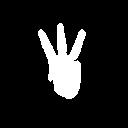

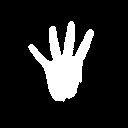

In [10]:
cv2_imshow(A_test[34])
cv2_imshow(A_train[34])


Creating np arrays and testings shape of them

In [11]:
X_train = np.array(A_train)
Y_train = np.array(Y_train)     

X_test = np.array(A_test)
Y_test = np.array(Y_test)

# Save the numpy arrays
np.save("X_train.npy", X_train)
np.save("Y_train.npy", Y_train)
np.save("X_test.npy", X_test)
np.save("Y_test.npy", Y_test)

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(18000, 128, 128, 3)
(18000, 6)
(3600, 128, 128, 3)
(3600, 6)


Image Data Genetor for rotated and modifyied image

(TESTing ..............)
---



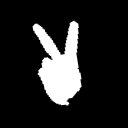

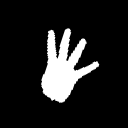

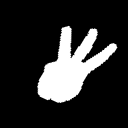

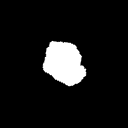

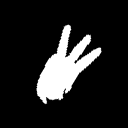

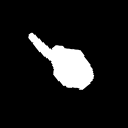

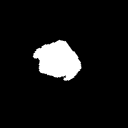

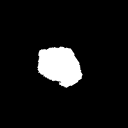

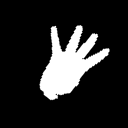

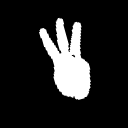

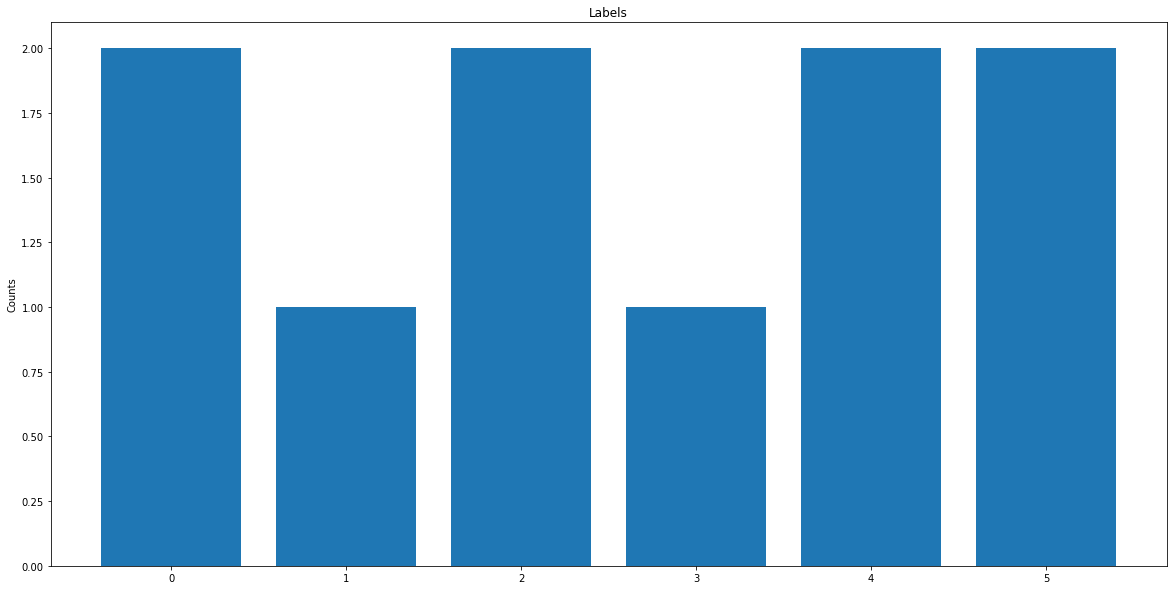

In [12]:
import cv2
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

aug = ImageDataGenerator(
    rotation_range=45,
    zoom_range=0.1,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range = 0.1,
    horizontal_flip=False,
    fill_mode="nearest")


batches = 0
x_sample = X_train
y_sample = Y_train
batch = 10
for x_batch, y_batch in aug.flow(x_sample, y_sample, batch_size=batch):
        cv2_imshow(x_batch[0,:])
        batches += 1
        if batches == 10:
            break
from collections import Counter

counts = Counter([x.argmax() for x in y_batch])
plt.subplots(figsize = (20,10))
values = [k for k in counts.values()]
labels = [k for k in counts.keys()]
plt.bar(labels, values, align='center')
plt.ylabel('Counts')
plt.title('Labels')

plt.show()

Splitting Dataset

In [0]:
# Form the training and validation data out of the train folder
X_t, X_v, Y_t, Y_v = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)


CReate custsmized model function

In [0]:
# Form the simple customized CNN model
def createModel(epoch,batchSize,dropout,denseActivationFunction,neurons,lossFunction,
                gradientDescent,evaluate):
  model = Sequential()
  model.add(Conv2D(32, (3,3), input_shape = (128, 128, 3), activation = 'relu'))
  model.add(MaxPool2D((2,2)))
  model.add(Conv2D(64, (3,3), activation = 'relu'))
  model.add(MaxPool2D((2,2)))
  model.add(Conv2D(128, (3,3), activation = 'relu'))
  model.add(MaxPool2D((2,2)))
  model.add(Conv2D(256, (3,3), activation = 'relu'))
  model.add(MaxPool2D((2,2)))
  model.add(Flatten())
  model.add(Dropout(dropout))
  model.add(Dense(neurons, activation = denseActivationFunction))
  model.add(Dropout(dropout))
  model.add(Dense(6, activation = 'softmax'))
  model.compile(gradientDescent, loss = lossFunction, metrics = ['accuracy'])
  #history = model.fit(x = X_t, y = Y_t, batch_size = batchSize, epochs = epoch, validation_data = (x_batch, y_batch))
  history = model.fit_generator(generator = aug.flow(X_train, Y_train, batch_size=32), steps_per_epoch= X_train.shape[0] // 32, 
                              validation_data=aug.flow(X_test, Y_test, batch_size=32), validation_steps = X_test.shape[0] // 32, epochs = 50, callbacks=callbacks_list)
  if evaluate == True:
    score = model.evaluate(X_v, Y_v)
    print("Loss : ",score[0])
    print("Accuracy : {} %".format(score[1]*100))
  return model,history


Callbacks for fineTuning

In [0]:
earlyStopping = EarlyStopping(monitor='val_loss', verbose=1, min_delta=0, restore_best_weights = True, patience=3, mode='min')
callbacks_list = [earlyStopping]

*Test Model parameters and do fine tuning above if needed*

In [16]:
model = createModel(epoch = 12,batchSize =32,dropout = 0.3,denseActivationFunction='tanh',neurons = 256,lossFunction='categorical_crossentropy',
                gradientDescent='SGD',evaluate=True)

Epoch 1/50
562/562 [==============================] - 78s 139ms/step - loss: 2.0595 - accuracy: 0.1666 - val_loss: 1.8344 - val_accuracy: 0.1669
Epoch 2/50
562/562 [==============================] - 73s 130ms/step - loss: 1.9279 - accuracy: 0.1690 - val_loss: 1.9207 - val_accuracy: 0.1673
Epoch 3/50
562/562 [==============================] - 73s 129ms/step - loss: 1.8687 - accuracy: 0.1715 - val_loss: 1.7871 - val_accuracy: 0.1662
Epoch 4/50
562/562 [==============================] - 72s 129ms/step - loss: 1.8443 - accuracy: 0.1674 - val_loss: 1.7794 - val_accuracy: 0.1682
Epoch 5/50
562/562 [==============================] - 73s 130ms/step - loss: 1.8231 - accuracy: 0.1755 - val_loss: 1.8290 - val_accuracy: 0.1698
Epoch 6/50
562/562 [==============================] - 73s 129ms/step - loss: 1.8138 - accuracy: 0.1756 - val_loss: 1.7775 - val_accuracy: 0.1928
Epoch 7/50
562/562 [==============================] - 73s 129ms/step - loss: 1.8132 - accuracy: 0.1844 - val_loss: 1.8087 - val_ac

Save Model

In [0]:
model[0].save('gestureRecognitionSoftwareVersionPLeaseWork2.h5')

Load Model and Display input Shape of Model

In [19]:
loaded_model = tf.keras.models.load_model('gestureRecognitionSoftwareVersionPLeaseWork2.h5')
loaded_model.layers[0].input_shape 

(None, 128, 128, 3)

function to determine what number is Image
# ***preprocessing from camera still left***


In [0]:
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import Image
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

def whatNumberIsImage(file,showMask = False):
  mask = cv2.imread(file)
  img = mask
  img = np.expand_dims(img, axis=0)
  #img = np.expand_dims(img, axis=-1)
  result=loaded_model.predict_classes(img)
  percentage= loaded_model.predict(img)
  class_names = ['0', '1', '2', '3', '4','5']
  classNum = 0
  for i in percentage[0]:
    print("class "+str(classNum)+ " : " + str(i*100))
    classNum = classNum + 1
  print("The above are all in percentages" )
  maxVal = result
  print("The predicted number(class) is : " + str(maxVal))
  if showMask == True:
    cv2_imshow(mask)

def testValidationset(image,showMask = False):
  img = image
  img = np.expand_dims(img, axis=0)
  # img = np.expand_dims(img, axis=-1)
  result=loaded_model.predict_classes(img)
  percentage= loaded_model.predict(img)
  class_names = ['0', '1', '2', '3', '4','5']
  classNum = 0
  for i in percentage[0]:
    print("class "+str(classNum)+ " : " + str(i*100))
    classNum = classNum + 1
  print("The above are all in percentages" )
  maxVal = result
  print("The predicted number(class) is : " + str(maxVal))
  if showMask == True:
    cv2_imshow(image)


Test Image

class 0 : 0.0020546031009871513
class 1 : 0.10564461117610335
class 2 : 2.3402102291584015
class 3 : 71.22931480407715
class 4 : 26.128214597702026
class 5 : 0.19456041045486927
The above are all in percentages
The predicted number(class) is : [3]


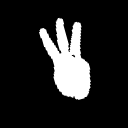

In [24]:
#whatNumberIsImage("Hi5.png",True)
testValidationset(x_batch[0],True)

Graphs of different measures

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


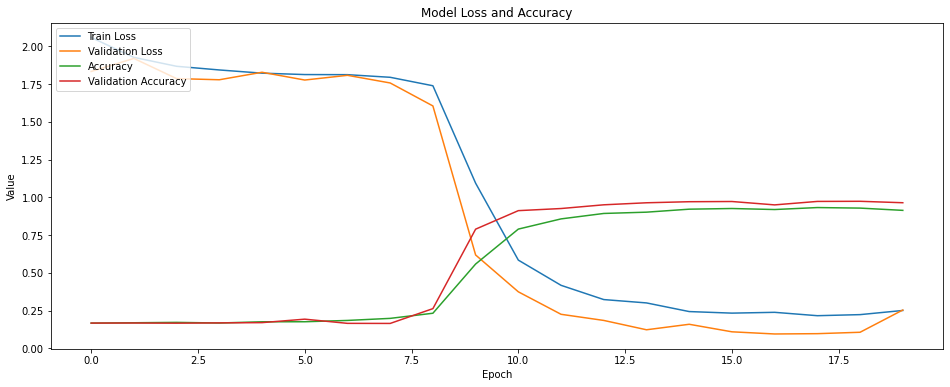

In [29]:

history = model[1]

print(history.history.keys())
plt.figure(figsize=(16, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Loss and Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss', "Accuracy", "Validation Accuracy"], loc='upper left')
plt.savefig('training.png')
plt.show()

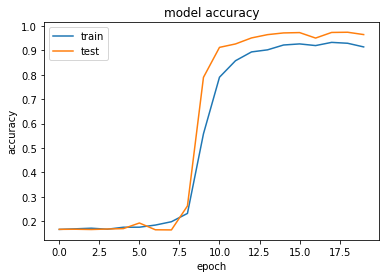

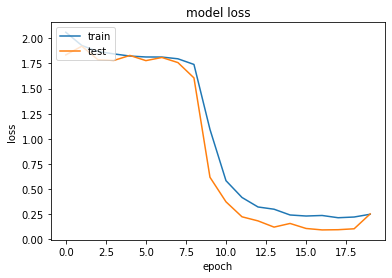

In [30]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')